In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [129]:
# creat file path to csv
data_df= pd.read_csv("../data/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
data_df.head()

#delete unecessary columns
covid_deaths_df= data_df[['Data As Of','State','Start Date','End Date','Sex',
                                     'Age Group','COVID-19 Deaths','Total Deaths','Pneumonia and COVID-19 Deaths',
                                     ]]
covid_deaths_df.head(52)        


,Data As Of,State,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,All Ages,1146774.0,12303399.0,569264.0
1,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,Under 1 year,519.0,73213.0,95.0
2,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,0-17 years,1696.0,130970.0,424.0
3,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,1-4 years,285.0,14299.0,66.0
4,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,5-14 years,509.0,22008.0,143.0
5,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,15-24 years,3021.0,133459.0,1257.0
6,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,18-29 years,7030.0,231382.0,3162.0
7,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,25-34 years,12401.0,278680.0,5842.0
8,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,30-39 years,19886.0,348041.0,9766.0
9,09/27/2023,United States,01/01/2020,09/23/2023,All Sexes,35-44 years,30108.0,416477.0,15228.0


In [ ]:
covid_deaths_df.dtypes

In [ ]:
#removing male/female
all_sexes_covid_deaths_df= covid_deaths_df.loc[(covid_deaths_df['Sex']=='All Sexes')&(covid_deaths_df['Age Group']=='All Ages')]
all_sexes_covid_deaths_df.head(52)

In [ ]:
#confirming which states are under column state in order to filter out any unwanted "states"
unique_values = all_sexes_covid_deaths_df['State'].unique()
unique_values

In [ ]:
#filter out unwanted data in the States column that we are not using for analysis
filtered_by_state= all_sexes_covid_deaths_df.loc[(all_sexes_covid_deaths_df ['State']!='Puerto Rico') & (all_sexes_covid_deaths_df['State']!='United States')
                                      & (all_sexes_covid_deaths_df['State']!= 'District of Columbia')] 

filling_null_df= filtered_by_state.fillna(0) 
filling_null_df.head(52)

In [155]:
drop_dupe= filling_null_df.drop_duplicates(subset=['State'])
drop_dupe.head(53)


,Data As Of,State,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
51,09/27/2023,Alabama,01/01/2020,09/23/2023,All Sexes,All Ages,21520.0,231602.0,7411.0
102,09/27/2023,Alaska,01/01/2020,09/23/2023,All Sexes,All Ages,1492.0,20039.0,813.0
153,09/27/2023,Arizona,01/01/2020,09/23/2023,All Sexes,All Ages,30307.0,284393.0,17435.0
204,09/27/2023,Arkansas,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
255,09/27/2023,California,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0
306,09/27/2023,Colorado,01/01/2020,09/23/2023,All Sexes,All Ages,15378.0,176094.0,7850.0
357,09/27/2023,Connecticut,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
408,09/27/2023,Delaware,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
510,09/27/2023,Florida,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
561,09/27/2023,Georgia,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0


In [157]:
drop_dupe.to_csv("CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv", index = False)
drop_dupe.head(53)

,Data As Of,State,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
51,09/27/2023,Alabama,01/01/2020,09/23/2023,All Sexes,All Ages,21520.0,231602.0,7411.0
102,09/27/2023,Alaska,01/01/2020,09/23/2023,All Sexes,All Ages,1492.0,20039.0,813.0
153,09/27/2023,Arizona,01/01/2020,09/23/2023,All Sexes,All Ages,30307.0,284393.0,17435.0
204,09/27/2023,Arkansas,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
255,09/27/2023,California,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0
306,09/27/2023,Colorado,01/01/2020,09/23/2023,All Sexes,All Ages,15378.0,176094.0,7850.0
357,09/27/2023,Connecticut,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
408,09/27/2023,Delaware,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
510,09/27/2023,Florida,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
561,09/27/2023,Georgia,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0


In [160]:
unique_values = drop_dupe['State'].unique()
unique_values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'New York City', 'North Carolina', 'North Dakota',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [159]:
clean_df=pd.read_csv("../data/CLEAN_FINAL2_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
clean_df.head(53)

,Data As Of,State,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,Alabama,01/01/2020,09/23/2023,All Sexes,All Ages,21520.0,231602.0,7411.0
1,09/27/2023,Alaska,01/01/2020,09/23/2023,All Sexes,All Ages,1492.0,20039.0,813.0
2,09/27/2023,Arizona,01/01/2020,09/23/2023,All Sexes,All Ages,30307.0,284393.0,17435.0
3,09/27/2023,Arkansas,01/01/2020,09/23/2023,All Sexes,All Ages,12663.0,140174.0,6060.0
4,09/27/2023,California,01/01/2020,09/23/2023,All Sexes,All Ages,109248.0,1178346.0,62152.0
5,09/27/2023,Colorado,01/01/2020,09/23/2023,All Sexes,All Ages,15378.0,176094.0,7850.0
6,09/27/2023,Connecticut,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
7,09/27/2023,Delaware,01/01/2020,09/23/2023,All Sexes,All Ages,3445.0,41037.0,1683.0
8,09/27/2023,Florida,01/01/2020,09/23/2023,All Sexes,All Ages,81894.0,915140.0,50161.0
9,09/27/2023,Georgia,01/01/2020,09/23/2023,All Sexes,All Ages,36499.0,384074.0,18689.0


Text(0.5, 1.0, 'COVID-19 Deaths per State')

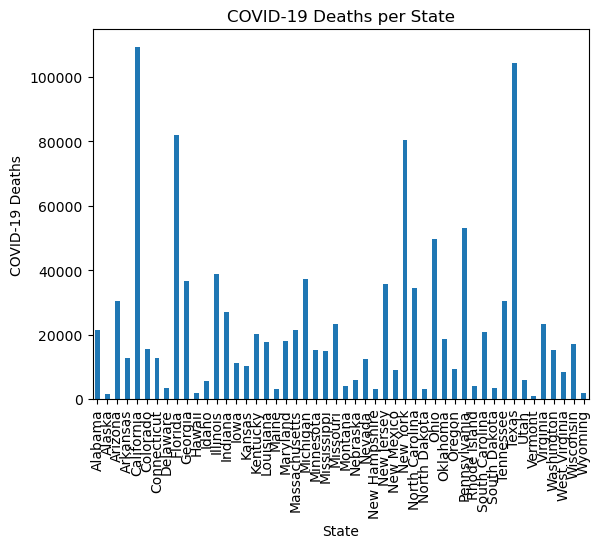

In [161]:
#making bar graph using groupby function to display COVID-19 deaths per state 
grouped_by_df = clean_df.groupby(['State'])['COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('COVID-19 Deaths')
plt.title('COVID-19 Deaths per State')


Text(0.5, 1.0, 'Pneumonia and COVID-19 Deaths per State')

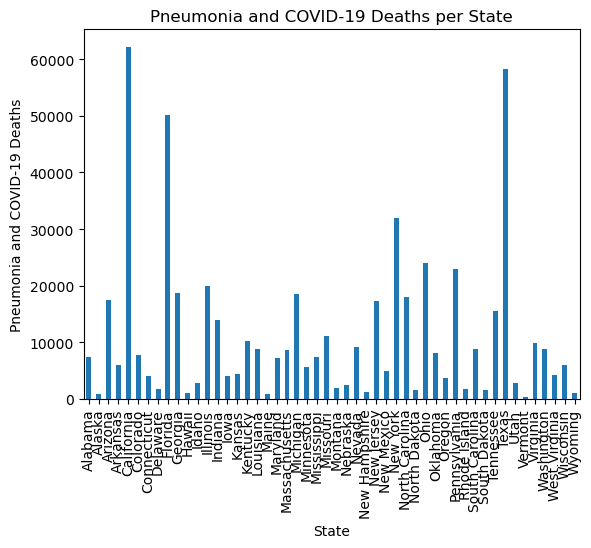

In [162]:
#making bar graph using groupby function to display Pneumonia and COVID-19 Deaths 
grouped_by_df = clean_df.groupby(['State'])['Pneumonia and COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='Pneumonia and COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Pneumonia and COVID-19 Deaths')
plt.title('Pneumonia and COVID-19 Deaths per State')


In [163]:
#make dataframe to group states by regions
def assign_region(state):
    # Replace these conditions with your criteria
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']:
        return 'Northeast'
    elif state in ['Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'Kansas','North Dakota', 'South Dakota','Nebraska']:
        return 'Midwest'
    elif state in ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee', 'Mississippi', 'Louisiana', 'Arkansas', 'Texas', 'Oklahoma']:
        return 'South'
    elif state in ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']:
        return 'West'
    else:
        return 'Unknown'
clean_df['Region'] = clean_df['State'].apply(assign_region)



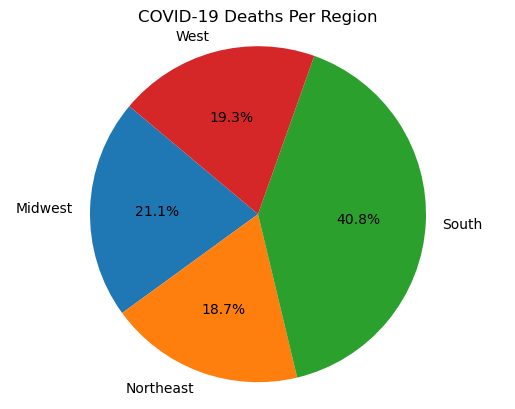

In [164]:
region_population = clean_df.groupby('Region')['COVID-19 Deaths'].sum()

# Create a pie chart
plt.pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Deaths Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

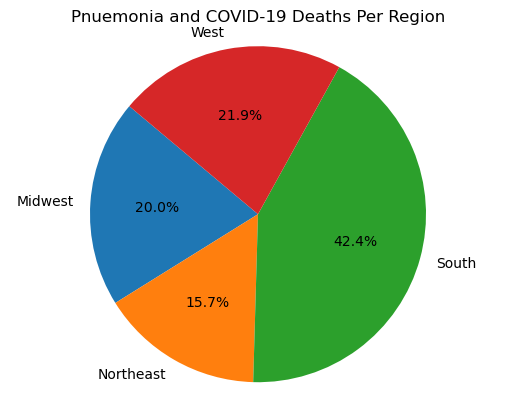

In [165]:
region_population = clean_df.groupby('Region')['Pneumonia and COVID-19 Deaths'].sum()

# Create a pie chart
plt.pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=140)
plt.title('Pnuemonia and COVID-19 Deaths Per Region')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

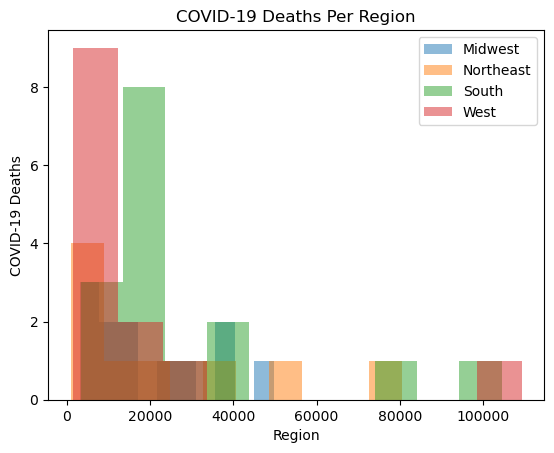

In [166]:
#make histogram per region of covid-19 deaths
clean_df.groupby('Region')['COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('COVID-19 Deaths')
plt.show()

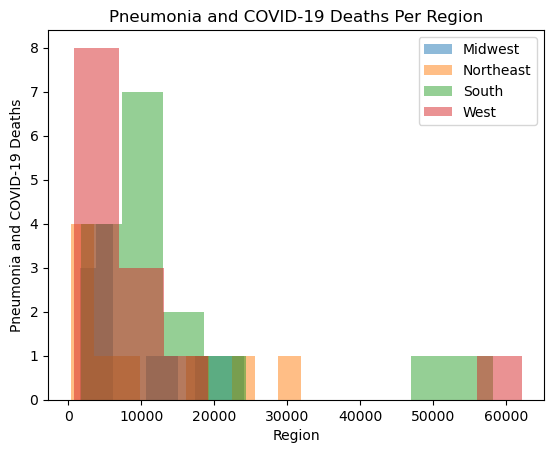

In [167]:
#make histogram per region of covid-19 & pnuemonia deaths
clean_df.groupby('Region')['Pneumonia and COVID-19 Deaths'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Pneumonia and COVID-19 Deaths Per Region')
plt.xlabel('Region')
plt.ylabel('Pneumonia and COVID-19 Deaths')
plt.show()

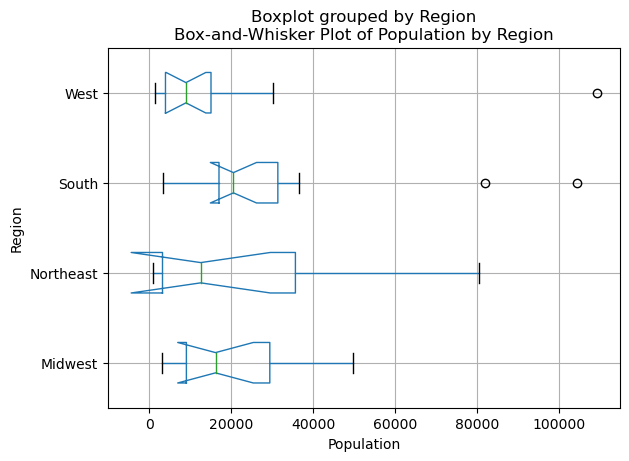

In [168]:
# Create a box-and-whisker plot by regions
clean_df.boxplot(column='COVID-19 Deaths', by='Region', notch=True, vert=False)
plt.title('Box-and-Whisker Plot of Population by Region')
plt.xlabel('Population')
plt.ylabel('Region')
plt.show()